In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import folium
from folium.plugins import MarkerCluster

In [24]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(pd.array(dataset.dtypes))

<PandasArray>
[  dtype('int64'),   dtype('int64'),       dtype('O'),       dtype('O'),
   dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
   dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'),       dtype('O'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), 

In [27]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [28]:
dataset.describe(include=['O'])

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0102A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [29]:
nulls = dataset.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(dataset)*100,2)

dataset_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
dataset_null.Attr  = nulls.index
dataset_null.Total = nulls.values
dataset_null.Percent = prcet.values
print(dataset_null.head(70))

                   Attr   Total  Percent
0                   pH2  864853   100.00
1   DIC Quality Comment  864808    99.99
2                   pH1  864779    99.99
3                  DIC2  864639    99.97
4                   TA2  864629    99.97
..                  ...     ...      ...
65               T_degC   10963     1.27
66               RecInd       0     0.00
67              R_Depth       0     0.00
68               R_PRES       0     0.00
69               Depthm       0     0.00

[70 rows x 3 columns]


In [30]:
for i in dataset_null.Attr[dataset_null['Percent'] > 30]:
    dataset = dataset.drop([i], axis=1)

In [31]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 0:
        dataset[i].fillna(dataset[i].mode().mean(), inplace=True)
        #print('filled',i)

In [32]:
nulls = dataset.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(dataset)*100,2)

dataset_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
dataset_null.Attr  = nulls.index
dataset_null.Total = nulls.values
dataset_null.Percent = prcet.values
print(dataset_null.head(35))

           Attr  Total  Percent
0        R_PRES      0      0.0
1       R_O2Sat      0      0.0
2       Btl_Cnt      0      0.0
3        Sta_ID      0      0.0
4      Depth_ID      0      0.0
5        Depthm      0      0.0
6        T_degC      0      0.0
7        Salnty      0      0.0
8        O2ml_L      0      0.0
9        STheta      0      0.0
10        O2Sat      0      0.0
11  Oxy_µmol/Kg      0      0.0
12       RecInd      0      0.0
13       T_prec      0      0.0
14       S_prec      0      0.0
15       P_qual      0      0.0
16       Chlqua      0      0.0
17       Phaqua      0      0.0
18         NH3q      0      0.0
19       C14A1q      0      0.0
20       C14A2q      0      0.0
21       DarkAq      0      0.0
22       MeanAq      0      0.0
23      R_Depth      0      0.0
24       R_TEMP      0      0.0
25     R_POTEMP      0      0.0
26   R_SALINITY      0      0.0
27      R_SIGMA      0      0.0
28        R_SVA      0      0.0
29      R_DYNHT      0      0.0
30      

In [33]:
dataset['Year'] = (dataset['Depth_ID'].str.split('-', expand=True)[0] + \
                dataset['Depth_ID'].str.split('-', expand=True)[1]). \
                map(lambda x: str(x)[:4])
dataset['Month'] = (dataset['Depth_ID'].str.split('-', expand=True)[1]). \
                 map(lambda x: str(x)[2:4])
                 
dataset[['Depth_ID','Year','Month']].head(10)

,Depth_ID,Year,Month
0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,03
1,19-4903CR-HY-060-0930-05400560-0008A-3,1949,03
2,19-4903CR-HY-060-0930-05400560-0010A-7,1949,03
3,19-4903CR-HY-060-0930-05400560-0019A-3,1949,03
4,19-4903CR-HY-060-0930-05400560-0020A-7,1949,03
5,19-4903CR-HY-060-0930-05400560-0030A-7,1949,03
6,19-4903CR-HY-060-0930-05400560-0039A-3,1949,03
7,19-4903CR-HY-060-0930-05400560-0050A-7,1949,03
8,19-4903CR-HY-060-0930-05400560-0058A-3,1949,03
9,19-4903CR-HY-060-0930-05400560-0075A-7,1949,03


In [34]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm']
dataset_norm = dataset.drop(drop_cols, axis=1)  #  data for normalization
dataset_scale = dataset_norm.copy(deep=True)    #  backup data

In [35]:
dataset_scale = StandardScaler().fit_transform(dataset_scale)

#  create dataframe
dataset_norm = pd.DataFrame(dataset_scale, index=dataset_norm.index, columns=dataset_norm.columns)

In [36]:
dataset_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
for i in dataset_norm.columns.tolist():
    if (dataset_norm[i].mode()[0] == 0.0):
        print(' - ',i,dataset_norm[i].mode()[0])
        dataset_norm = dataset_norm.drop(i,axis=1)

#  Create correlation dataframe
dataset_corr = pd.DataFrame(columns=['Attributes','Correlation'])
dataset_corr.Attributes = dataset_norm.corr()['Salnty'].sort_values(ascending=False).index
dataset_corr.Correlation = dataset_norm.corr()['Salnty'].sort_values(ascending=False).values
print(dataset_corr)

     Attributes  Correlation
0        Salnty     1.000000
1    R_SALINITY     0.997472
2       R_DYNHT     0.662413
3       R_SIGMA     0.569549
4        STheta     0.545147
5       R_Depth     0.529287
6        R_PRES     0.528064
7        RecInd     0.060568
8          NH3q     0.018628
9        Phaqua     0.005455
10       Chlqua     0.005139
11       C14A2q     0.003865
12       MeanAq     0.003865
13       C14A1q     0.003865
14       DarkAq     0.003679
15       P_qual     0.001892
16        Month    -0.002340
17       T_prec    -0.017962
18       S_prec    -0.096793
19         Year    -0.179102
20       T_degC    -0.474769
21       R_TEMP    -0.474770
22     R_POTEMP    -0.487599
23  Oxy_µmol/Kg    -0.555258
24      R_O2Sat    -0.612447
25        O2Sat    -0.617832
26       O2ml_L    -0.618206
27         R_O2    -0.618209
28        R_SVA    -0.652126


In [42]:
plot_attr = ['R_DYNHT', 'R_SIGMA', 'R_Depth', 'RecInd', 'NH3q',  'T_prec', 'T_degC', 'R_POTEMP', 'O2ml_L']

for i in plot_attr:
    if plot_attr[0] == i:
        dataset_plot = dataset_corr[dataset_corr.Attributes == i]
    else:
        dataset_plot = dataset_plot.append(dataset_corr[dataset_corr.Attributes == i])
print(dataset_plot)

#  take sample of data for plotting
dataset_sample = dataset_norm.sample(n=int(round(len(dataset)*.002,0)), random_state=0)
print('\n\nPlotting data shape: {}'.format(dataset_sample.shape))

   Attributes  Correlation
2     R_DYNHT     0.662413
3     R_SIGMA     0.569549
5     R_Depth     0.529287
7      RecInd     0.060568
8        NH3q     0.018628
17     T_prec    -0.017962
20     T_degC    -0.474769
22   R_POTEMP    -0.487599
26     O2ml_L    -0.618206


Plotting data shape: (1730, 29)


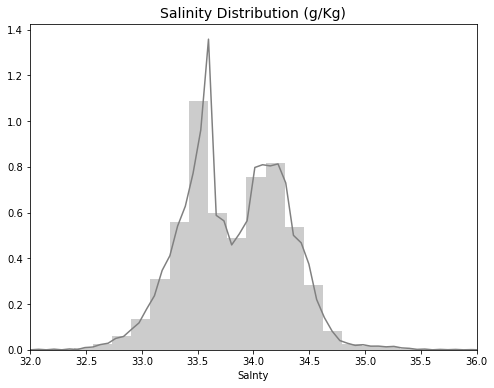

In [38]:
plt.figure(figsize=(8,6))
plt.xlim([32, 36])#  Salinity distribution
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(dataset['Salnty'], color='gray')

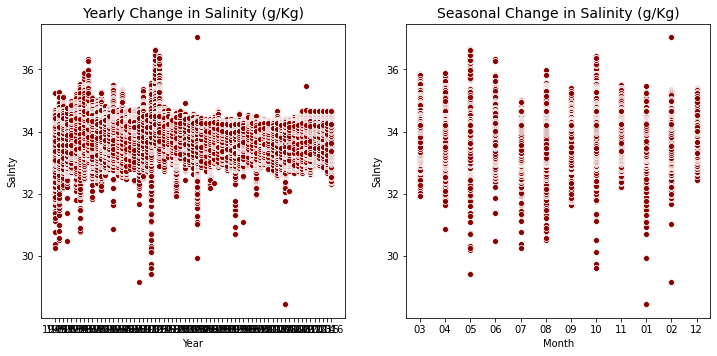

In [40]:
#  Yearly change in Salinity
fig = plt.figure(figsize=(12,6))
fig.autofmt_xdate()
fig.add_subplot(121)
plt.title('Yearly Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=dataset, x='Year', y='Salnty', color='darkred')

#  Seasonal change in Salinity
fig.add_subplot(122)
plt.title('Seasonal Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=dataset, x='Month', y='Salnty', color='darkred')
plt.show()

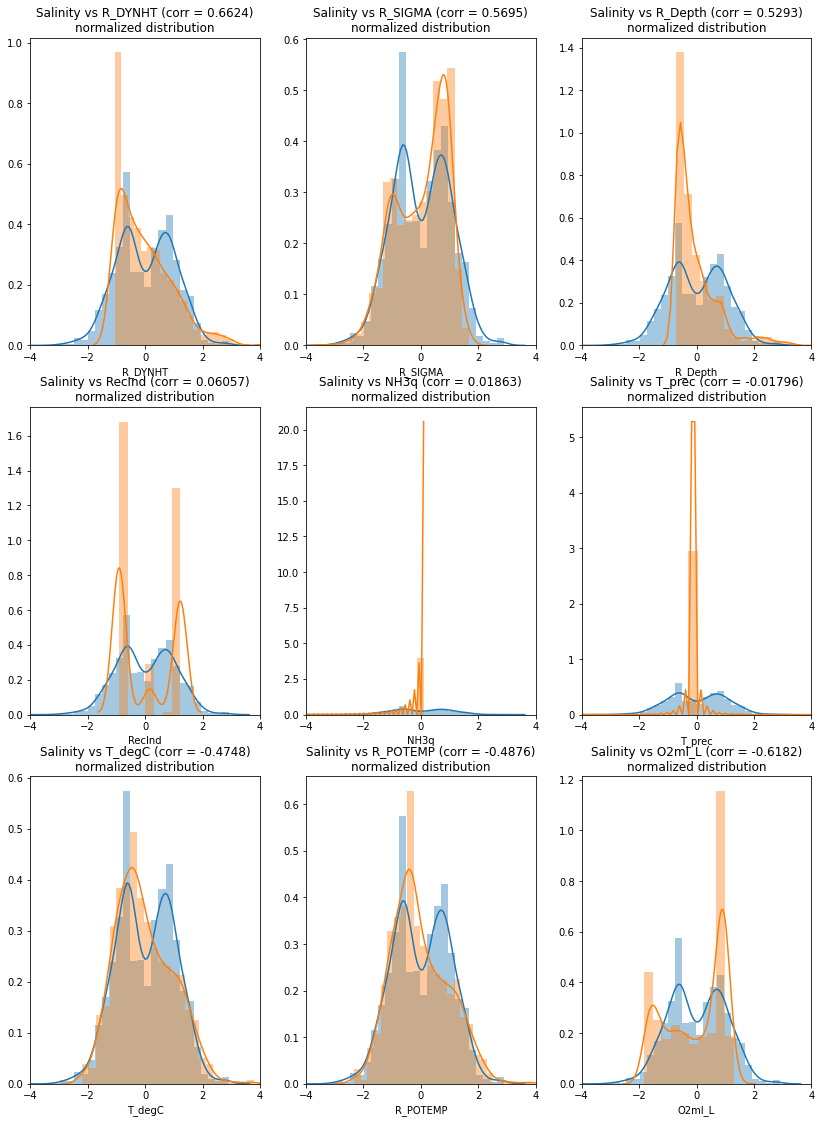

In [43]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(dataset_corr.Attributes)/col)
count = 1

for i, j in zip(dataset_plot.Attributes,dataset_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4})\nnormalized distribution'.format(i,j))
    plt.xlim(-4,4)
    sns.distplot(dataset_sample.Salnty)
    sns.distplot(dataset_sample[i])
    count = count + 1

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:255: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.6/dist-packages/seaborn/algorithms.py:85: RankWarn

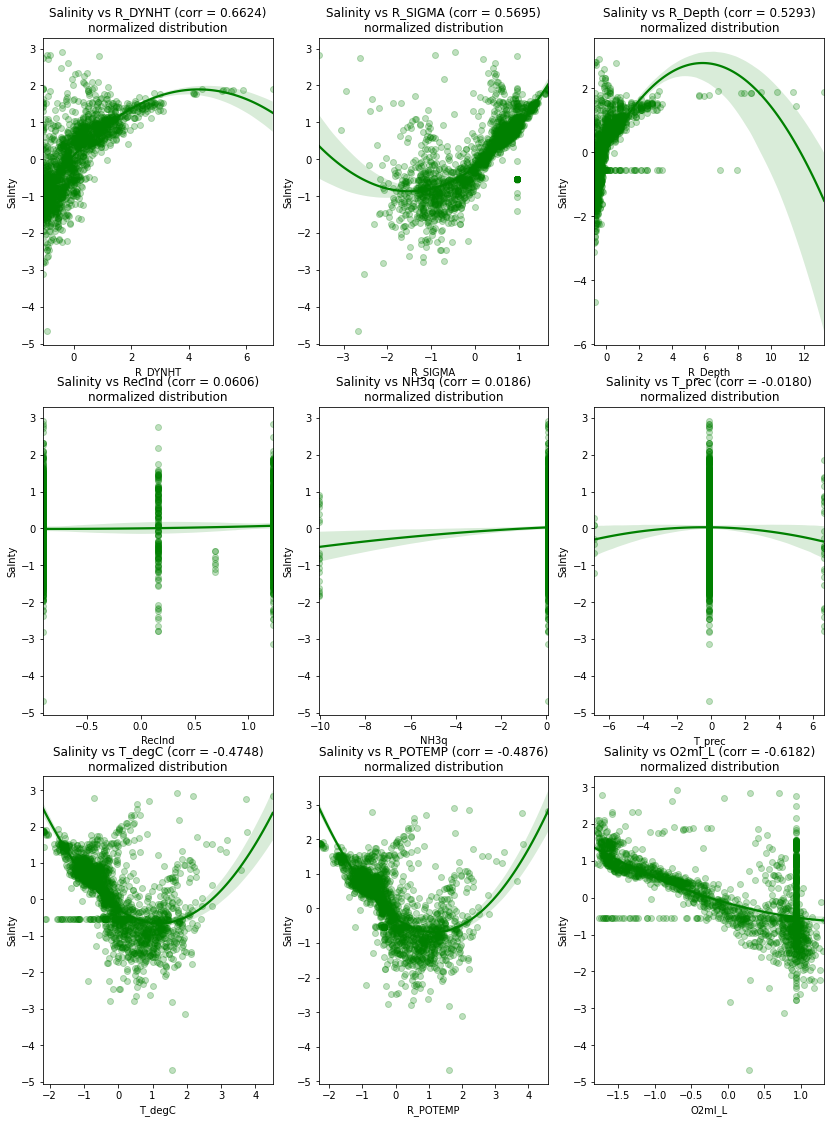

In [47]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(dataset_corr.Attributes)/col)
count = 1

for i, j in zip(dataset_plot.Attributes,dataset_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4f})\nnormalized distribution'.format(i,j))
    sns.regplot(x=dataset_sample[i],y="Salnty",data=dataset_sample,order=2, scatter_kws={'alpha':0.25},color='green');
    count = count + 1

plt.show()

In [48]:
dfLOC = pd.read_csv('/content/drive/My Drive/BCML/datasets/cast.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
#  select location points
dfLOC = dfLOC[['Lat_Dec', 'Lon_Dec','Date']]
dfLOC = dfLOC.tail(1000)
dfLOC = dfLOC.reset_index(drop=True)  # reset index after tail

#  create folium map
salinity_map   = folium.Map(location=[dfLOC.Lat_Dec.mean(),dfLOC.Lon_Dec.mean()], zoom_start=6)
marker_cluster = MarkerCluster().add_to(salinity_map)

for i in range(len(dfLOC)):
    folium.Marker(location=[dfLOC.Lat_Dec[i],dfLOC.Lon_Dec[i]],
            popup = (dfLOC.Date[i]),         # dates in popups
            icon = folium.Icon(color='green')  # green popup icon
    ).add_to(marker_cluster)

salinity_map.add_child(marker_cluster)
salinity_map         #  display map